<a href="https://colab.research.google.com/github/elekanshola/raphaelshola/blob/main/Guasian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data= pd.read_csv('/content/exNB.csv', header = None)
data

,0,1,2
0,75.626754,181.704486,1.0
1,70.540408,176.177640,1.0
2,76.875023,178.667364,1.0
3,70.225610,157.504877,1.0
4,74.106298,168.525499,1.0
...,...,...,...
995,68.394140,141.464087,0.0
996,65.280727,138.177757,0.0
997,65.345827,135.199530,0.0
998,59.385331,152.598596,0.0


In [ ]:
data.head()

,0,1,2
0,75.626754,181.704486,1.0
1,70.540408,176.177640,1.0
2,76.875023,178.667364,1.0
3,70.225610,157.504877,1.0
4,74.106298,168.525499,1.0


## transforming to Numpy Array

In [ ]:
X=data.to_numpy()
X

array([[ 75.62675441, 181.70448626,   1.        ],
       [ 70.54040833, 176.17763989,   1.        ],
       [ 76.87502316, 178.66736388,   1.        ],
       ...,
       [ 65.34582701, 135.19952982,   0.        ],
       [ 59.38533074, 152.59859562,   0.        ],
       [ 68.708487  , 129.95783574,   0.        ]])

In [ ]:
y=X[:,-1] # columns mean all of the row, the -1 is the last column


In [ ]:
X=X[:,:-1]
X

array([[ 75.62675441, 181.70448626],
       [ 70.54040833, 176.17763989],
       [ 76.87502316, 178.66736388],
       ...,
       [ 65.34582701, 135.19952982],
       [ 59.38533074, 152.59859562],
       [ 68.708487  , 129.95783574]])

In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

## Visualizations


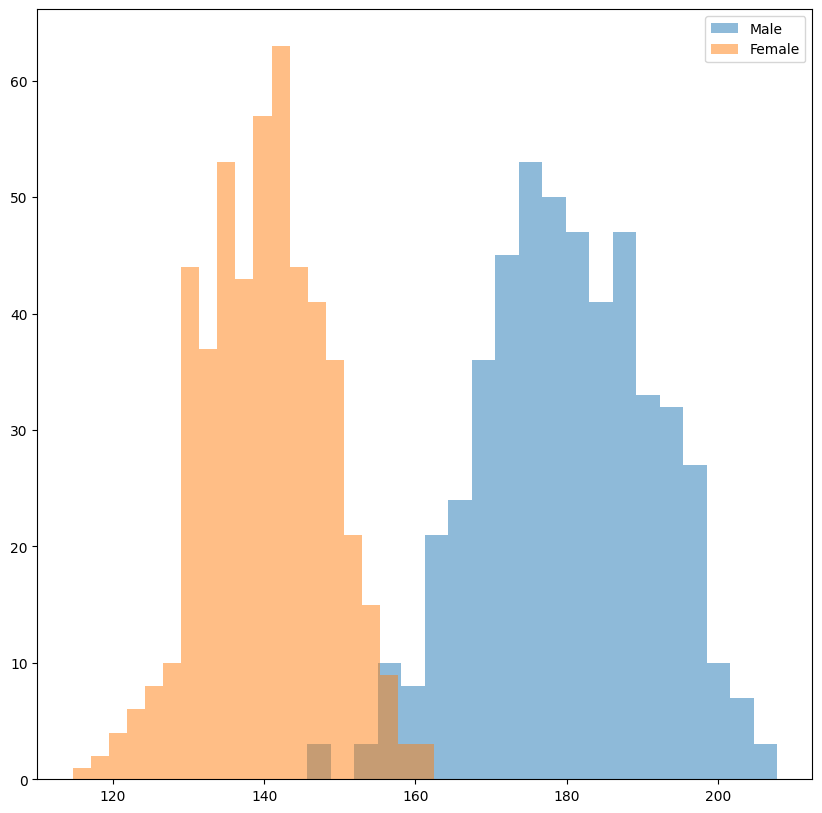

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(X[y==1,1],label='Male', alpha=0.5,  bins=20)
plt.hist(X[y==0,1],label='Female', alpha=0.5, bins=20)
plt.legend()
plt.show()

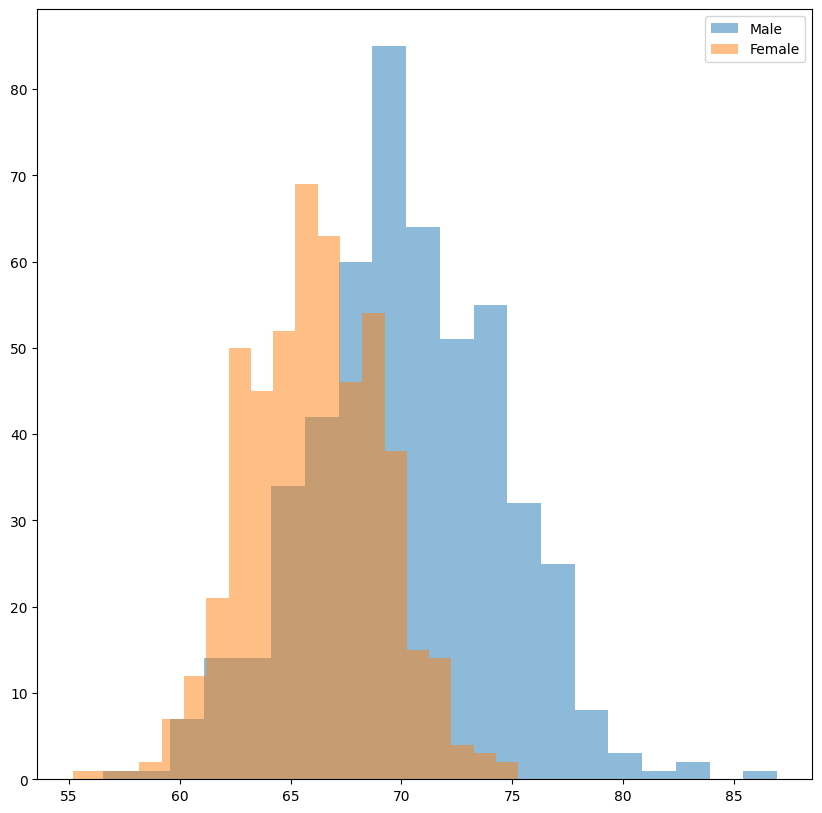

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(X[y==1,0],label='Male', alpha=0.5,  bins=20)
plt.hist(X[y==0,0],label='Female', alpha=0.5, bins=20)
plt.legend()
plt.show()

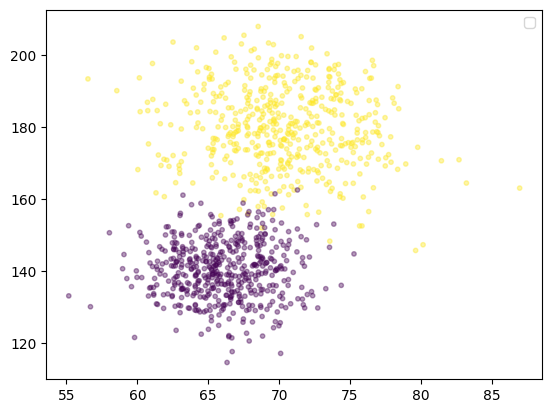

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y, alpha=0.4, s=10)
plt.legend()
plt.show()

## NAIVE BAYES' CLASSIFIER

In [ ]:
from scipy.stats import multivariate_normal as mvn

In [ ]:
gnb=GaussNB()



NameError: name 'GaussNB' is not defined

In [ ]:
gnb.fit(X,y)


(500, 2)
(500, 2)


In [ ]:
y_hat=gnb.predict(X)

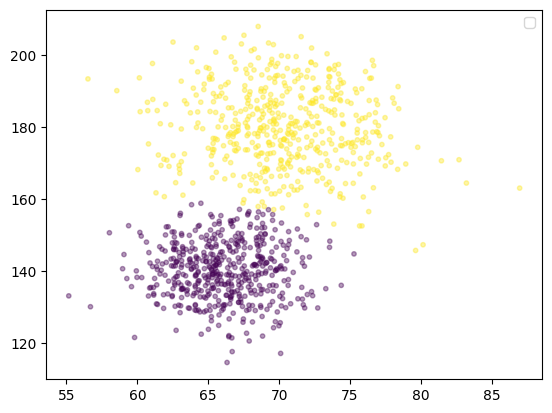

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y_hat, alpha=0.4, s=10)
plt.legend()
plt.show()

In [ ]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
accuracy(y,y_hat)

0.988

**Coin_Flip**

In [ ]:
def Coinflip(y):
  y_hat=np.zeros(len(y))
  for i in range(len(y)):
    flip = np.random.randn(1)
    if flip>0:
      y_hat[i]=1
  return(y_hat)

In [ ]:
accuracy(y, Coinflip(y))

0.477

**DATA_2**

In [ ]:
data2 = pd.read_csv('/content/xor.csv')

In [ ]:
X2=data2.to_numpy()


In [ ]:
y2 =X2[:,-1]

In [ ]:
X2=X2[:,:-1]

In [ ]:
X2.shape

(4000, 2)

In [ ]:
y2.shape

(4000,)

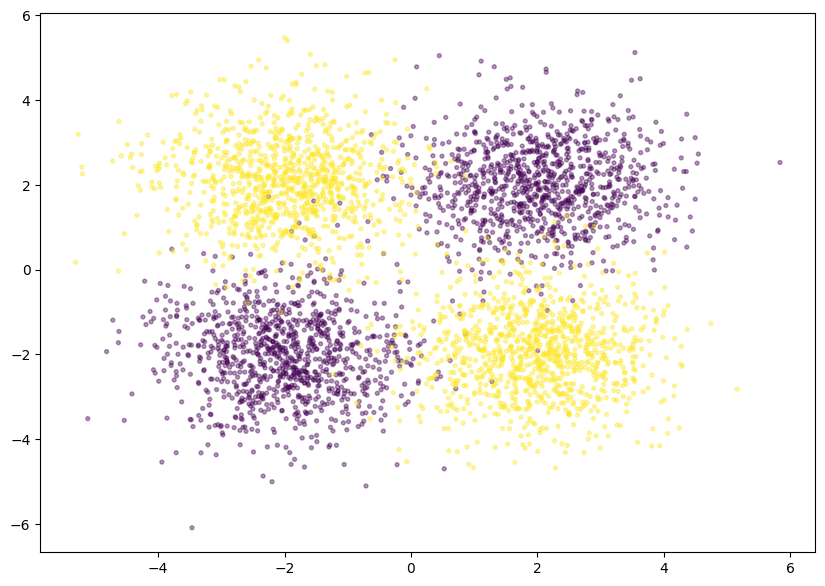

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X2[:,0], X2[:,1], c=y2, alpha= 0.4, s=8)

TESTING WITH NAIVE BAYES

In [ ]:
gnb2=GaussNB()

In [ ]:
gnb2.fit(X2,y2)

(2000, 2)
(2000, 2)


In [ ]:
y_hat_nb= gnb2.predict(X2)

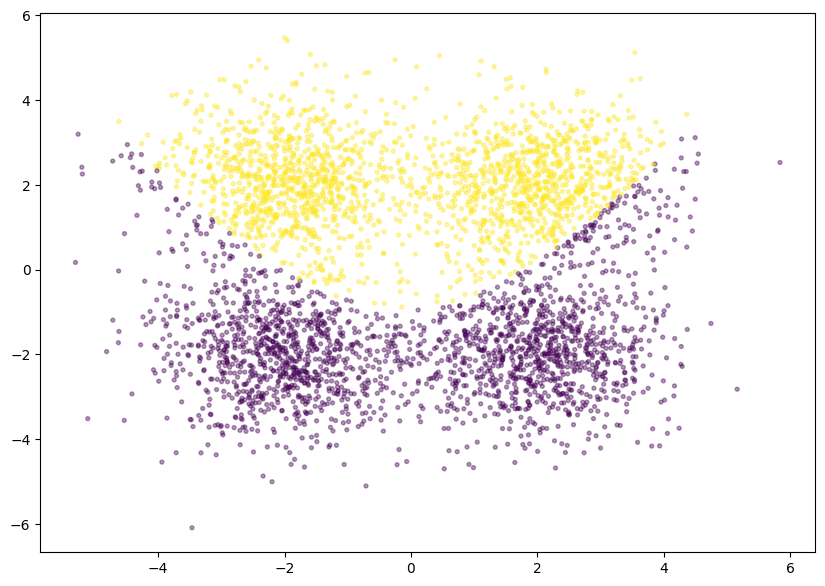

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X2[:,0], X2[:,1], c=y_hat_nb, alpha= 0.4, s=8)

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X2[:,0], X2[:,1], c=y_hat_bayes, alpha= 0.4, s=8)

NameError: name 'y_hat_bayes' is not defined

<Figure size 1000x700 with 0 Axes>

CHECK THE ACCURACY


In [ ]:
accuracy(y2, y_hat_nb)

0.51275

class GaussBayes

In [ ]:
## we will be calculating the covariance matrix


In [ ]:
class GaussBayes():

  def fit(self, X, y, epsilon = 1e-3):
     self.likelihoods=dict()
     self.priors= dict()
     self.K =set(y.astype(int))

     for k in self.K:
       X_k = X[y==k,:]
       N_K, D = X_k.shape
       mu_k =X_k.mean(axis=0)

       self.likelihoods[k]= {'mean': X_k.mean(axis=0), 'cov':(1/(N_K-1)) * np.matmul((X_k - mu_k).T, X_k -mu_k)+ epsilon*np.identity(D)}
       self.priors[k]= len(X_k)/len(X)

  def predict(self,X):
      N, D =X.shape
      P_hat = np.zeros((N,len(self.K)))
      for k, l in self.likelihoods.items():
        P_hat[:, k]= mvn.logpdf(X, l['mean'], l['cov'])+ np.log(self.priors[k])


      return P_hat.argmax(axis=1)

In [ ]:
gaussbayes = GaussBayes()


In [ ]:
gaussbayes.fit(X2,y2,epsilon =1e-3)

NameError: name 'X2' is not defined

In [ ]:
y_hat_bayes = gaussbayes.predict(X2)


In [ ]:
accuracy(y2,y_hat_bayes)

0.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets/MNIST_train.csv')
data

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X= data.to_numpy()

In [ ]:
y= X[:,2]
y

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
X

array([[    0,     0,     5, ...,     0,     0,     0],
       [    1,     1,     0, ...,     0,     0,     0],
       [    2,     2,     4, ...,     0,     0,     0],
       ...,
       [59997, 59997,     5, ...,     0,     0,     0],
       [59998, 59998,     6, ...,     0,     0,     0],
       [59999, 59999,     8, ...,     0,     0,     0]])

In [ ]:
X.shape


(60000, 787)

In [ ]:
y.shape

(60000,)

In [ ]:
X=X[:,3:]

In [ ]:
X.shape

(60000, 784)

In [ ]:
from scipy.stats import multivariate_normal as mvn

In [ ]:
class GaussNB():
  def fit(self, X, y, espilon=1e-3):
   self.likelihoods=dict()
   self.priors= dict()
   self.K=set(y.astype(int))

   for k in self.K:
    X_k=X[y==k]
    print(X_k.shape)
    self.likelihoods[k]={'mean':X_k.mean(axis=0), 'cov':X_k.var(axis=0)+epsilon}
    self.priors[K]= len(X_k)/len(X)

  def predict(self, X):
    N,D = X.shape
    P_hat= np.zeros(N,len(self.K))

    for k, l in self.likelihood.items():
      P_hat[:, k ]=mvn.logpdf(X, l['mean'], l['cov'])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)




In [ ]:
gnb=GaussNB()

In [ ]:
gnb.fit(X,y)

(5923, 784)


NameError: name 'epsilon' is not defined